In [11]:
from pprint import pprint
from spatial_transport import register_processes
from spatial_transport.utils import get_regular_edges, generate_voxels, generate_shared_environments, COMPARTMENTS, plot_concentrations_2d
from process_bigraph import Process, Step, Composite, ProcessTypes
from process_bigraph.emitter import gather_emitter_results
import numpy as np

In [12]:
spacing = 2
compartments = generate_compartments(dims=[3, 3, 0], spacing=spacing)
edges = get_regular_edges(compartments, spacing=spacing)
compartments = generate_shared_environments(compartments, spacing=spacing, substrates=['glucose', 'acetate', 'biomass'])

In [13]:
pprint(compartments)

{'0': {'Shared Environment': {'concentrations': {'acetate': 0.5559583884925855,
                                                 'biomass': 0.04354394461746097,
                                                 'glucose': 0.9542156974811664},
                              'counts': {'acetate': 4.447667107940684,
                                         'biomass': 0.3483515569396878,
                                         'glucose': 7.633725579849331},
                              'volume': 8},
       'position': [1.0, 1.0, 0.0]},
 '1': {'Shared Environment': {'concentrations': {'acetate': 0.6379649320270487,
                                                 'biomass': 0.40771013995424654,
                                                 'glucose': 0.2753922584735316},
                              'counts': {'acetate': 5.10371945621639,
                                         'biomass': 3.2616811196339723,
                                         'glucose': 2.203138067788253},
      

In [14]:
field = {
    COMPARTMENTS: compartments,
    "Edges": edges,
}

In [15]:
pprint(field)

{'Compartments': {'0': {'Shared Environment': {'concentrations': {'acetate': 0.5559583884925855,
                                                                  'biomass': 0.04354394461746097,
                                                                  'glucose': 0.9542156974811664},
                                               'counts': {'acetate': 4.447667107940684,
                                                          'biomass': 0.3483515569396878,
                                                          'glucose': 7.633725579849331},
                                               'volume': 8},
                        'position': [1.0, 1.0, 0.0]},
                  '1': {'Shared Environment': {'concentrations': {'acetate': 0.6379649320270487,
                                                                  'biomass': 0.40771013995424654,
                                                                  'glucose': 0.2753922584735316},
                                 

In [ ]:
class SimpleDiffusion(Process):
    """Simple diffusion between compartments"""
    config_schema = {
        "spacing": "float",
        "substrates": "map[float]",
    }

    def __init__(self, config, core):
        super.__init__(config, core)

        self.substrates = config['substrates']

    def inputs(self):
        return {
            "compartments": "compartments",
            "edges": "map[edge]",
        }

    def outputs(self):
        return {
            compartments: "any"
        }

    def update(self, inputs, interval):
        edges = inputs['edges']
        compartments = inputs['compartments']

        update = {
            'Compartments': {
                compartment_id: {
                    'Shared Environment': compartments[compartment_id]['Shared Environment'],
                }
            }
        for compartment_id in compartments.keys()}

        for edge in edges:
            compartment1 = compartments[edge[0]]
            compartment2 = compartments[edge[1]]
            conc1 = compartments[compartment1]['Shared Environment']['concentrations']
            conc2 = compartments[compartment2]['Shared Environment']['concentrations']
            for substrate in self.substrates.keys():
                concentration1 = conc1[substrate]
                concentration2 = conc2[substrate]
                diffusivity = self.substrates[substrate]

                d_conc = -diffusivity * (concentration2 - concentration1)






In [21]:
number = list(np.arange(0, 10, 0.5))

In [22]:
number

[np.float64(0.0),
 np.float64(0.5),
 np.float64(1.0),
 np.float64(1.5),
 np.float64(2.0),
 np.float64(2.5),
 np.float64(3.0),
 np.float64(3.5),
 np.float64(4.0),
 np.float64(4.5),
 np.float64(5.0),
 np.float64(5.5),
 np.float64(6.0),
 np.float64(6.5),
 np.float64(7.0),
 np.float64(7.5),
 np.float64(8.0),
 np.float64(8.5),
 np.float64(9.0),
 np.float64(9.5)]

In [16]:
float(number)

5.0

In [17]:
pprint(compartments)

{'0': {'Shared Environment': {'concentrations': {'acetate': 0.5559583884925855,
                                                 'biomass': 0.04354394461746097,
                                                 'glucose': 0.9542156974811664},
                              'counts': {'acetate': 4.447667107940684,
                                         'biomass': 0.3483515569396878,
                                         'glucose': 7.633725579849331},
                              'volume': 8},
       'position': [1.0, 1.0, 0.0]},
 '1': {'Shared Environment': {'concentrations': {'acetate': 0.6379649320270487,
                                                 'biomass': 0.40771013995424654,
                                                 'glucose': 0.2753922584735316},
                              'counts': {'acetate': 5.10371945621639,
                                         'biomass': 3.2616811196339723,
                                         'glucose': 2.203138067788253},
      

In [25]:
update = {
            'Compartments': {
                compartment_id: {
                    'Shared Environment': {
                        "counts": compartments[compartment_id]['Shared Environment']["counts"]
                    },
                }
            for compartment_id in compartments.keys()}
        }

In [26]:
pprint(update)

{'Compartments': {'0': {'Shared Environment': {'counts': {'acetate': 4.447667107940684,
                                                          'biomass': 0.3483515569396878,
                                                          'glucose': 7.633725579849331}}},
                  '1': {'Shared Environment': {'counts': {'acetate': 5.10371945621639,
                                                          'biomass': 3.2616811196339723,
                                                          'glucose': 2.203138067788253}}},
                  '2': {'Shared Environment': {'counts': {'acetate': 8.666509556655914,
                                                          'biomass': 1.3638955176383827,
                                                          'glucose': 3.4809631476582004}}},
                  '3': {'Shared Environment': {'counts': {'acetate': 8.085806097954755,
                                                          'biomass': 4.342811879842216,
                    

In [27]:
update = {
    "counts": {
        "acetate": 0.5,
        "biomass": 0.5,
        "glucose": 0.5,
    }
}

In [28]:
pprint(update)

{'counts': {'acetate': 0.5, 'biomass': 0.5, 'glucose': 0.5}}


In [29]:
update = {
            compartment_id: {
                'counts': {
                    substrate: 0 for substrate in ["glucose", "acetate", "biomass"]
                },
            }
        for compartment_id in compartments.keys()}

In [30]:
pprint(update)

{'0': {'counts': {'acetate': 0, 'biomass': 0, 'glucose': 0}},
 '1': {'counts': {'acetate': 0, 'biomass': 0, 'glucose': 0}},
 '2': {'counts': {'acetate': 0, 'biomass': 0, 'glucose': 0}},
 '3': {'counts': {'acetate': 0, 'biomass': 0, 'glucose': 0}},
 '4': {'counts': {'acetate': 0, 'biomass': 0, 'glucose': 0}},
 '5': {'counts': {'acetate': 0, 'biomass': 0, 'glucose': 0}},
 '6': {'counts': {'acetate': 0, 'biomass': 0, 'glucose': 0}},
 '7': {'counts': {'acetate': 0, 'biomass': 0, 'glucose': 0}},
 '8': {'counts': {'acetate': 0, 'biomass': 0, 'glucose': 0}}}


In [3]:
import numpy as np
np.array([1,1]) - np.array([2,2])

array([-1, -1])

In [1]:
enumerate(['x', 'y', 'z'])

In [2]:
for i, dim in enumerate(['x', 'y', 'z']):
    print(i, dim)

0 x
1 y
2 z


In [5]:
from bigraph_viz import plot_bigraph
from spatial_transport.utils import get_regular_edges, generate_voxels, generate_shared_environments, plot_concentrations_2d
from spatial_transport.processes.diffusion import get_simple_diffusion_spec

spec = {}
substrates = {
    "glucose": 0.06,
    "acetate": 0.12,
}
spec["Simple Diffusion"] = get_simple_diffusion_spec(spacing=1, substrates=substrates, interval = 0.1)
comps = generate_voxels(dims=[2, 2, 0], spacing=1)
comps = generate_shared_environments(comps, spacing=1, substrates=substrates)
spec["Compartments"] = comps
edges = get_regular_edges(comps, spacing=1)
spec["Edges"] = edges
# # set emitter specs
# spec["emitter"] = emitter_from_wires({
#     "global_time": ["global_time"],
#     'compartments': ['Compartments'],
# })

In [6]:
from pprint import pprint

In [7]:
pprint(spec)

{'Compartments': {'0': {'Shared Environment': {'concentrations': {'acetate': 6.6933934050653585,
                                                                  'glucose': 9.582446323850176},
                                               'counts': {'acetate': 6.6933934050653585,
                                                          'glucose': 9.582446323850176},
                                               'volume': 1},
                        'position': [0.5, 0.5, 0.0]},
                  '1': {'Shared Environment': {'concentrations': {'acetate': 9.306369576594228,
                                                                  'glucose': 4.606066966037796},
                                               'counts': {'acetate': 9.306369576594228,
                                                          'glucose': 4.606066966037796},
                                               'volume': 1},
                        'position': [0.5, 1.5, 0.0]},
                  '2': {'Sha

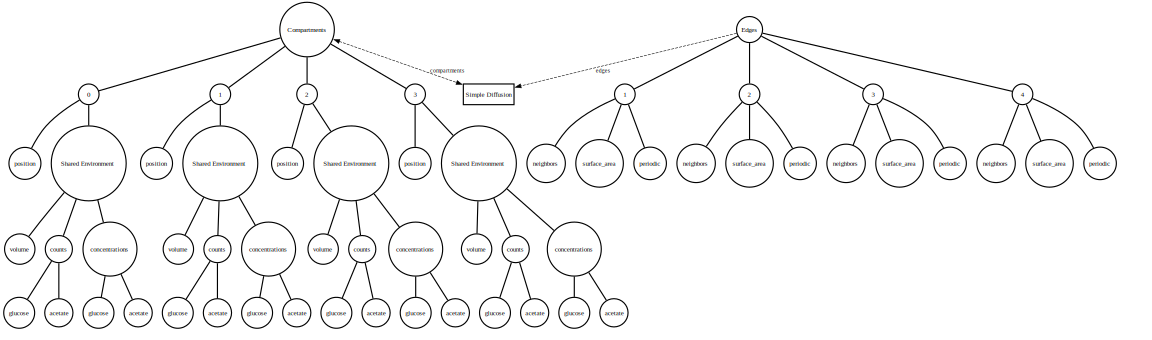

In [10]:
(plot_bigraph(spec))

(<Figure size 600x500 with 2 Axes>,
 <Axes: title={'center': 'Glucose Concentration Heatmap'}, xlabel='X Position', ylabel='Y Position'>)

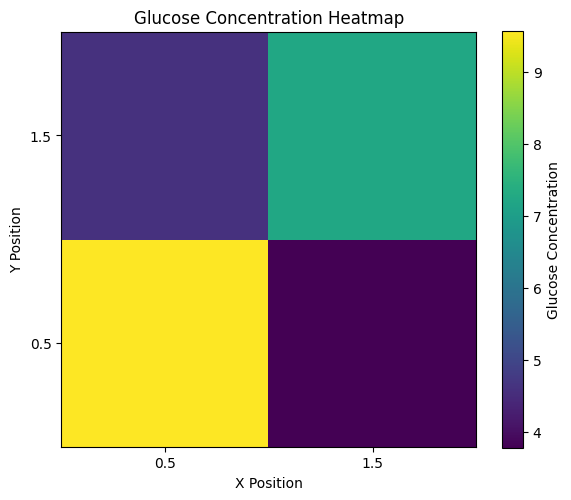

In [13]:
plot_concentrations_2d(comps)